In [2]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.preprocessing import StandardScaler
 from sklearn.decomposition import PCA
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense, Dropout
 from sklearn.svm import SVR
 from sklearn.preprocessing import StandardScaler
 from sklearn.pipeline import make_pipeline
 from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('fastfood_calories.csv')

In [4]:
df.head()

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [5]:
df.shape

(515, 18)

In [6]:
df = df.drop(columns=['Unnamed: 0','salad'])

In [7]:
df['restaurant'] = df['restaurant'].str.strip()
df['restaurant'] = df['restaurant'].replace({
    'Mcdonalds': 'McDonalds',
    'Chick Fil-A': 'Chick-fil-A',
    'Arbys': 'Arby\'s',
    'Dairy Queen': 'Dairy Queen',
    'Burger King': 'Burger King',
    'Subway': 'Subway',
    'Taco Bell': 'Taco Bell',
    'Sonic': 'Sonic'
 })

In [8]:
df['item'] = df['item'].str.strip()

In [9]:
numeric_cols = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar','protein', 'vit_a', 'vit_c', 'calcium']
df[numeric_cols] = df[numeric_cols].replace('NA', pd.NA)

In [10]:
cleaned_df = df.copy()

In [11]:
print("Missing values per column:")
print(cleaned_df.isnull().sum())

Missing values per column:
restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
dtype: int64


In [12]:
cleaned_df.fillna(0,inplace=True)

In [13]:
print("Missing values per column:")
print(cleaned_df.isnull().sum())

Missing values per column:
restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
dtype: int64


In [14]:
cleaned_df[numeric_cols] = cleaned_df[numeric_cols].apply(pd.to_numeric)

In [15]:
print(f"Duplicate rows: {cleaned_df.duplicated().sum()}")

Duplicate rows: 2


In [16]:
cleaned_df.drop_duplicates(inplace=True)

In [17]:
print(f"Duplicate rows: {cleaned_df.duplicated().sum()}")

Duplicate rows: 0


In [18]:
cleaned_df.shape

(513, 16)

In [19]:
print("\nBasic statistics:")
print(cleaned_df[numeric_cols].describe())


Basic statistics:
          calories      cal_fat   total_fat     sat_fat   trans_fat  \
count   513.000000   513.000000  513.000000  513.000000  513.000000   
mean    531.111111   238.945419   26.604288    8.152047    0.462963   
std     282.900251   166.683320   18.442620    6.431223    0.840615   
min      20.000000     0.000000    0.000000    0.000000    0.000000   
25%     330.000000   120.000000   14.000000    4.000000    0.000000   
50%     490.000000   210.000000   23.000000    7.000000    0.000000   
75%     690.000000   310.000000   35.000000   11.000000    1.000000   
max    2430.000000  1270.000000  141.000000   47.000000    8.000000   

       cholesterol       sodium  total_carb       fiber       sugar  \
count   513.000000   513.000000  513.000000  513.000000  513.000000   
mean     72.553606  1247.309942   45.647173    4.031189    7.272904   
std      63.259522   691.157795   24.924070    3.066802    6.770483   
min       0.000000    15.000000    0.000000    0.000000  

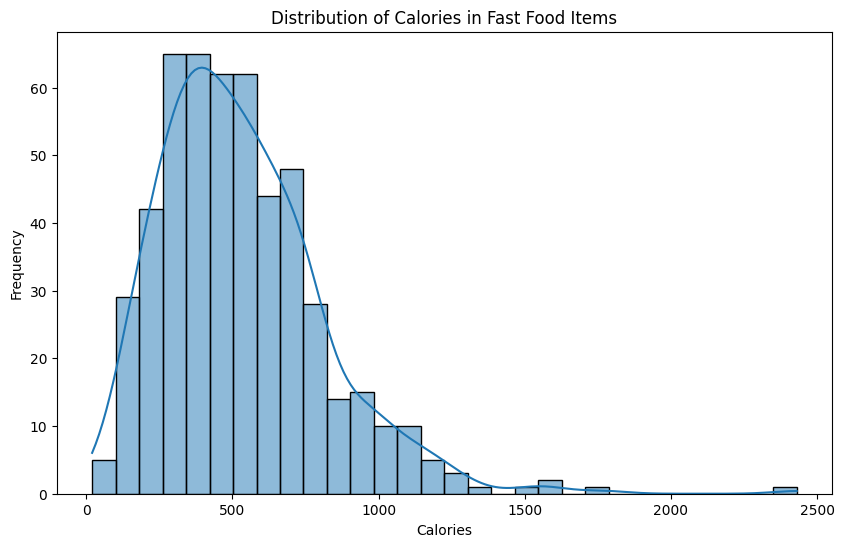

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df,x='calories', bins=30, kde=True)
plt.title("Distribution of Calories in Fast Food Items")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

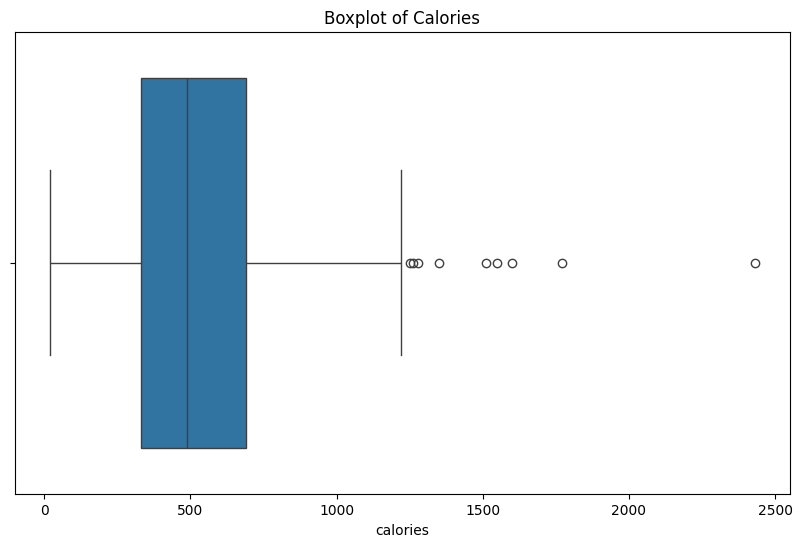

In [21]:
plt.figure(figsize=(10, 6))  # Adjust dimensions for horizontal plot
sns.boxplot(data=cleaned_df['calories'], orient='h')  # 'h' for horizontal
plt.title("Boxplot of Calories")
plt.show()

In [22]:
avg_calories = cleaned_df.groupby('restaurant')['calories'].mean().sort_values()
avg_calories

restaurant
Chick-fil-A    384.444444
Taco Bell      443.008850
Subway         503.020833
Dairy Queen    520.238095
Arby's         532.727273
Burger King    608.571429
Sonic          631.698113
McDonalds      640.350877
Name: calories, dtype: float64

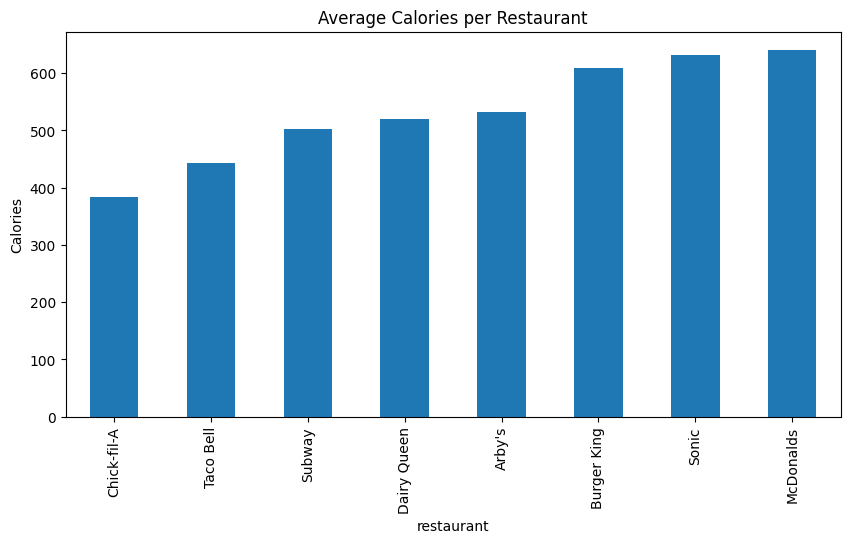

In [23]:
avg_calories.plot(kind='bar', figsize=(10, 5))
plt.title("Average Calories per Restaurant")
plt.ylabel("Calories")
plt.show()

In [24]:
nutrition_cols = ['total_fat','cholesterol', 'sodium', 'total_carb','protein', 'vit_a', 'vit_c', 'calcium']

In [25]:
nutrition_df = cleaned_df[nutrition_cols]

In [26]:
scaler = StandardScaler()
nutrition_scaled = scaler.fit_transform(nutrition_df)

In [27]:
pca = PCA()
principal_components = pca.fit_transform(nutrition_scaled)

In [28]:
eigenvalues = pca.explained_variance_
print("Eigenvalues (Explained Variance):")
print(eigenvalues)
print('\n')
 # Calculate total variation
total_variation = sum(eigenvalues)
print(f"Total Variation: {total_variation:.4f}")

Eigenvalues (Explained Variance):
[3.62708009 1.73060937 1.05326545 0.55329004 0.52165363 0.2767663
 0.18135126 0.07160885]


Total Variation: 8.0156


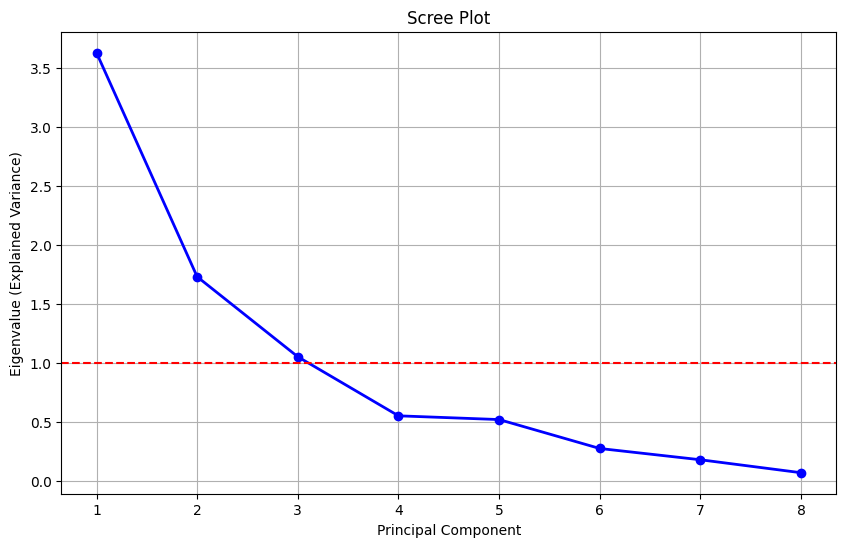

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion line
plt.grid()
plt.show()

In [30]:
proportions = eigenvalues / total_variation
print("\nProportion of Total Variation for Each Principal Component:")
for i, prop in enumerate(proportions):
  print(f"PC{i+1}: {prop:.4f} ({prop*100:.2f}%)")


Proportion of Total Variation for Each Principal Component:
PC1: 0.4525 (45.25%)
PC2: 0.2159 (21.59%)
PC3: 0.1314 (13.14%)
PC4: 0.0690 (6.90%)
PC5: 0.0651 (6.51%)
PC6: 0.0345 (3.45%)
PC7: 0.0226 (2.26%)
PC8: 0.0089 (0.89%)


In [31]:
cumulative_prop = np.cumsum(proportions)
print("\nCumulative Proportion of Total Variation:")
for i, cum_prop in enumerate(cumulative_prop):
  print(f"PC1 to PC{i+1}: {cum_prop:.4f} ({cum_prop*100:.2f}%)")


Cumulative Proportion of Total Variation:
PC1 to PC1: 0.4525 (45.25%)
PC1 to PC2: 0.6684 (66.84%)
PC1 to PC3: 0.7998 (79.98%)
PC1 to PC4: 0.8688 (86.88%)
PC1 to PC5: 0.9339 (93.39%)
PC1 to PC6: 0.9684 (96.84%)
PC1 to PC7: 0.9911 (99.11%)
PC1 to PC8: 1.0000 (100.00%)


In [32]:
eigenvectors = pca.components_
print("\nEigenvectors (Principal Components Loadings):")
for i, component in enumerate(eigenvectors):
 print(f"\nPrincipal Component {i+1}:")
 print(pd.Series(component, index=nutrition_cols))


Eigenvectors (Principal Components Loadings):

Principal Component 1:
total_fat      0.442161
cholesterol    0.439113
sodium         0.462206
total_carb     0.351446
protein        0.483096
vit_a         -0.023045
vit_c          0.065194
calcium        0.190688
dtype: float64

Principal Component 2:
total_fat     -0.221559
cholesterol   -0.132198
sodium        -0.033768
total_carb     0.121204
protein        0.010279
vit_a          0.525961
vit_c          0.624742
calcium        0.500561
dtype: float64

Principal Component 3:
total_fat     -0.186130
cholesterol   -0.407167
sodium         0.149720
total_carb     0.589960
protein       -0.180170
vit_a         -0.516420
vit_c         -0.098615
calcium        0.346736
dtype: float64

Principal Component 4:
total_fat      0.001945
cholesterol    0.289722
sodium        -0.370343
total_carb    -0.393118
protein        0.108265
vit_a         -0.327757
vit_c         -0.162096
calcium        0.692055
dtype: float64

Principal Component 5:
total

In [33]:
print(cleaned_df["restaurant"].value_counts())

restaurant
Taco Bell      113
Subway          96
Burger King     70
McDonalds       57
Arby's          55
Sonic           53
Dairy Queen     42
Chick-fil-A     27
Name: count, dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_13224\1706716752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x='restaurant', order=cleaned_df['restaurant'].value_counts().index, palette='viridis')


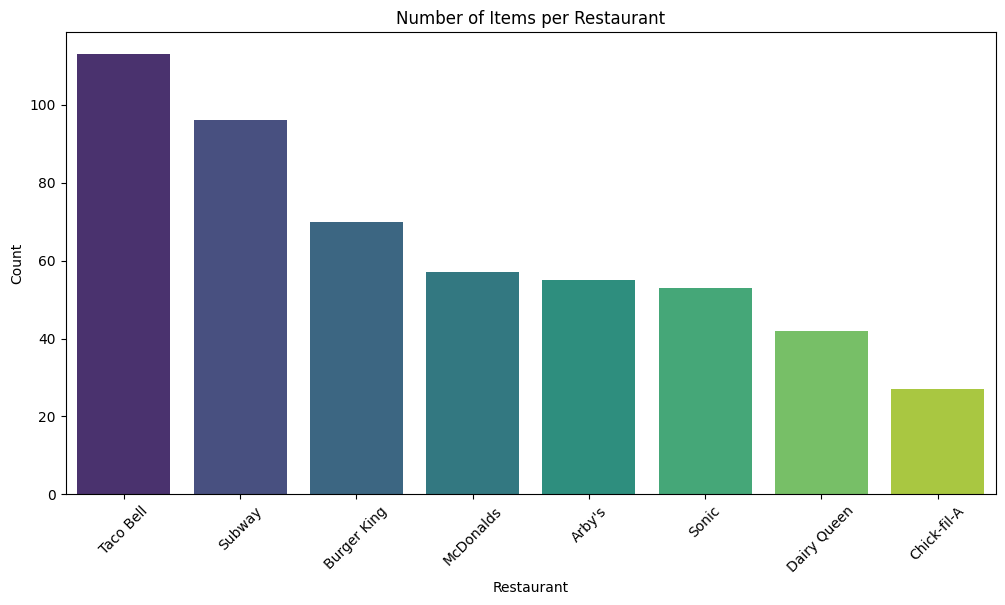

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=cleaned_df, x='restaurant', order=cleaned_df['restaurant'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Restaurant")
plt.ylabel("Count")
plt.title("Number of Items per Restaurant")
plt.show()

               protein    sodium  total_fat
restaurant                                 
Arby's       29.254545  1.515273  26.981818
Burger King  29.585714  1.223571  36.814286
Chick-fil-A  31.703704  1.151481  16.148148
Dairy Queen  24.833333  1.181786  28.857143
McDonalds    40.298246  1.437895  31.807018
Sonic        29.188679  1.350755  37.641509
Subway       30.312500  1.272969  18.479167
Taco Bell    17.380531  1.012389  20.858407


<Figure size 1200x600 with 0 Axes>

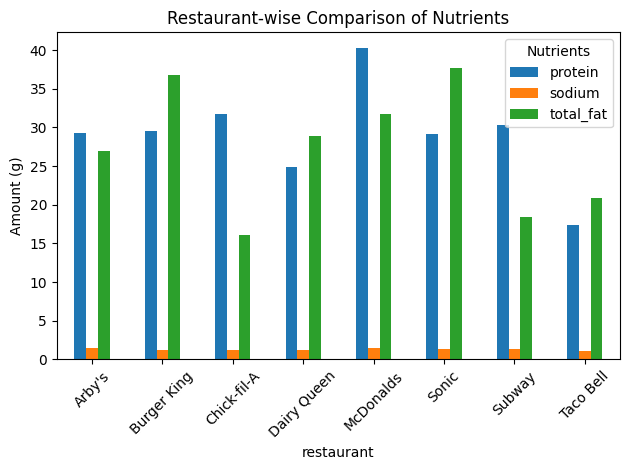

In [35]:
data = cleaned_df.copy()
data['sodium'] = data['sodium']/1000

restaurant_stats = data.groupby('restaurant')[['protein', 'sodium' , 'total_fat']].mean()
print(restaurant_stats)

plt.figure(figsize=(12, 6))
restaurant_stats.plot(kind='bar', stacked=False)
plt.title('Restaurant-wise Comparison of Nutrients')
plt.ylabel('Amount (g)')
plt.xticks(rotation=45)
plt.legend(title='Nutrients')
plt.tight_layout()
plt.show()